# IMDB Movie Recommendations Based on Users' and Critics' Reviews

# Question: IMDB wants to identify similar movies based on movie's characteristics. How to accomplish this?
Our question for movie recs is centered around women viewers. We will ask for movie recommendations based on a women audience's reviews, votes, scores and rankings. We are hypothesizing that women:
    1) represent more socially and culturally aware gender regarding popular culture in other countries; and
    2) represent a huge, diverse group that skews towards family-friendly movies that are more popular and palatable for foreign audiences. (Source: See women's magazine Glamour feature: https://www.glamour.com/gallery/best-family-movies)
    
We formed this question based on the fact that women tend to bring their children to movie theaters, and therefore do more vetting of movies prior to purchasing tickets. Since they are bringing children, they tend to screen movies for violence, adult content, nudity and sexuality, as well as language.  (Common Sense Media, a nonprofit group with mainly women senior advisors, organizes movie rating campaigns for popular movies. They are a key stakeholder in the reviews process relyong on mothers (women with kids). Source: https://www.commonsensemedia.org/movie-lists/family-movies-we-love)

According to our bivariate analysis section on our movide data, english is the primary language for movie production, followed by Spanish. The US (69 percent)and the UK (9.7 percent) are the top film producing countries in English movies. Spain is the top producer of Spanish movies: 844 movies.

## Methodology: 
1) Select Data set: Kaggle ~ https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+movies.csv
2) Join the ratings with the 'movies': Use pd.merge
3) Review for missing data and drop columns with missing values. Drop columns that do not explain preferences, like 'date_published'.
4) Conduct exploratory data analysis and note outliers through Boxplotting.
5) Perform clustering across four similarity models: K-means, 'Minibatch', DBSCAN, and Agglomaerative. Drop the non female ratings, votes, reviews, and critics columns as well as the US and world income columns. 
6) Go back to hypertune parameters by reintroducing said columns in second Notebook to conduct Principal Component Analysis and include in K-Means, DBSCAN and Means-shift clustering models. 
7) Review movie recommendations to evaluate clusters for future recommendations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MultiLabelBinarizer

import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize

## Combine Data Sets

In [3]:
movies = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb movies.csv')
names = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb names.csv')
ratings = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb ratings.csv')
# Not useful: title_principals = pd.read_csv('/Users/mehrunisaqayyum/Downloads/IMDb title_principals.csv')

In [4]:
movie_recs = pd.merge(movies, ratings, on='imdb_title_id')
movie_recs

imdb_title_id                                              title  \
0         tt0000574                        The Story of the Kelly Gang   
1         tt0001892                                     Den sorte drøm   
2         tt0002101                                          Cleopatra   
3         tt0002130                                          L'Inferno   
4         tt0002199  From the Manger to the Cross; or, Jesus of Naz...   
...             ...                                                ...   
81268     tt9903716                                             Jessie   
81269     tt9905412                                              Ottam   
81270     tt9905462                                          Pengalila   
81271     tt9911774                          Padmavyuhathile Abhimanyu   
81272     tt9914286                                  Sokagin Çocuklari   

                                          original_title  year date_published  \
0                            The Story of the Kelly Gang  1906     1906-12-26   
1                                         Den sorte drøm  1911     1911-08-19   
2                                              Cleopatra  1912     1912-11-13   
3                                              L'Inferno  1911     1911-03-06   
4      From the Manger to the Cross; or, Jesus of Naz...  1912           1913   
...                                                  ...   ...            ...   
81268                                             Jessie  2019     2019-03-15   
81269                                              Ottam  2019     2019-03-08   
81270                                          Pengalila  2019     2019-03-08   
81271                          Padmavyuhathile Abhimanyu  2019     2019-03-08   
81272                                  Sokagin Çocuklari  2019     2019-03-15   

                           genre  duration           country   language  \
0        Biography, Crime, Drama        70         Australia        NaN   
1                          Drama        53  Germany, Denmark        NaN   
2                 Drama, History       100               USA    English   
3      Adventure, Drama, Fantasy        68             Italy    Italian   
4               Biography, Drama        60               USA    English   
...                          ...       ...               ...        ...   
81268           Horror, Thriller       106             India     Telugu   
81269                      Drama       120             India  Malayalam   
81270                      Drama       111             India  Malayalam   
81271                      Drama       130             India  Malayalam   
81272              Drama, Family        98            Turkey    Turkish   

                                  director  ... females_30age_avg_vote  \
0                             Charles Tait  ...                    6.0   
1                                Urban Gad  ...                    5.8   
2                       Charles L. Gaskill  ...                    5.5   
3      Francesco Bertolini, Adolfo Padovan  ...                    7.3   
4                            Sidney Olcott  ...                    4.8   
...                                    ...  ...                    ...   
81268                      Aswani Kumar V.  ...                    5.6   
81269                                  Zam  ...                    NaN   
81270                        T.V. Chandran  ...                    NaN   
81271                      Vineesh Aaradya  ...                    NaN   
81272                    Ahmet Faik Akinci  ...                    NaN   

      females_30age_votes females_45age_avg_vote females_45age_votes  \
0                    19.0                    6.6                14.0   
1                     4.0                    6.5                 8.0   
2                    14.0                    6.2                20.0   
3                    74.0                    7.4                75

## Exploratory Data Analysis:


### Univariate Analysis:
Our data set has 81,273 records/datapoints before dropping columns with missing values. We have 70 variables.  
Our categorical variables include: 'genre', 'country', 'language', director', 'title', 'actor', 'production company', and 'IMDB title' which is redundant.
We have significantly missing data in the following columns (meaning more than 5 percent missing values): 
'metascore'
'usa_gross_income'	
'females_0age_avg_vote'	
'females_0age_votes'
'males_0age_avg_vote'
'males_0age_votes'
'budget'
'allgenders_0age_avg_vote'
'allgenders_0age_votes'
'worlwide_gross_income'
'reviews_from_critics'
'reviews_from_users'
'females_18age_votes'
'females_18age_avg_vote'

In [92]:
movie_recs.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes'

## Missing Values
total_missing = house_df.isnull().sum().sort_values(ascending=False)
percent_missing = (house_df.isnull().sum()/house_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [93]:
total_missing = movie_recs.isnull().sum().sort_values(ascending=False)
percent_missing = (movie_recs.isnull().sum()/movie_recs.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing,percent_missing], axis =1)
missing_data.head(20)

0         1
metascore                 68551  0.843466
usa_gross_income          66179  0.814280
females_0age_avg_vote     65940  0.811340
females_0age_votes        65940  0.811340
males_0age_avg_vote       60934  0.749745
males_0age_votes          60934  0.749745
budget                    58469  0.719415
allgenders_0age_avg_vote  54730  0.673409
allgenders_0age_votes     54730  0.673409
worlwide_gross_income     51381  0.632203
reviews_from_critics      10987  0.135186
reviews_from_users         7077  0.087077
females_18age_votes        5034  0.061939
females_18age_avg_vote     5034  0.061939
production_company         4325  0.053216
females_45age_avg_vote     2572  0.031646
females_45age_votes        2572  0.031646
description                2430  0.029899
writer                     1493  0.018370
males_18age_votes          1056  0.012993

### Detecting Outliers:
Look for outliers using boxplot and histogram for 'Reviews from Critics' and 'Duration' in case we need to set movie length thresshold.

In [94]:
movie_recs.describe()

year      duration      avg_vote         votes     metascore  \
count  81273.000000  81273.000000  81273.000000  8.127300e+04  12722.000000   
mean    1993.007210    100.565981      5.926587  9.421771e+03     55.762695   
std       23.992284     25.320189      1.243315  5.220245e+04     17.757453   
min     1906.000000     40.000000      1.000000  9.900000e+01      1.000000   
25%     1979.000000     88.000000      5.200000  2.060000e+02     43.000000   
50%     2002.000000     96.000000      6.100000  4.950000e+02     56.000000   
75%     2012.000000    108.000000      6.800000  1.865000e+03     69.000000   
max     2019.000000   3360.000000     10.000000  2.159628e+06    100.000000   

       reviews_from_users  reviews_from_critics  weighted_average_vote  \
count        74196.000000          70286.000000           81273.000000   
mean            43.753194             27.992758               5.926587   
std            159.903568             58.708764               1.243315   
min              1.000000              1.000000               1.000000   
25%              4.000000              3.000000               5.200000   
50%              9.000000              8.000000               6.100000   
75%             26.000000             24.000000               6.800000   
max           8302.000000            987.000000              10.000000   

        total_votes     mean_vote  ...  females_30age_avg_vote  \
count  8.127300e+04  81273.000000  ...            80409.000000   
mean   9.421771e+03      6.259578  ...                6.103064   
std    5.220245e+04      1.161615  ...                1.452682   
min    9.900000e+01      1.000000  ...                1.000000   
25%    2.060000e+02      5.600000  ...                5.300000   
50%    4.950000e+02      6.400000  ...                6.300000   
75%    1.865000e+03      7.100000  ...                7.000000   
max    2.159628e+06     10.000000  ...               10.000000   

       females_30age_votes  females_45age_avg_vote  females_45age_votes  \
count         80409.000000            78701.000000         78701.000000   
mean            635.330672                6.064022           184.702024   
std            3350.118823                1.542429           771.842552   
min               1.000000                1.000000             1.000000   
25%              10.000000                5.300000             6.000000   
50%              27.000000                6.300000            16.000000   
75%             111.000000                7.000000            63.000000   
max          114034.000000               10.000000         30244.000000   

       top1000_voters_rating  top1000_voters_votes  us_voters_rating  \
count           80667.000000          80667.000000      81034.000000   
mean                5.139347             77.299974          5.967583   
std                 1.315429            127.173472          1.322301   
min                 1.000000              1.000000          1.000000   
25%                 4.300000             12.000000          5.200000   
50%                 5.300000             28.000000          6.200000   
75%                 6.000000             77.000000          6.900000   
max                10.000000            936.000000         10.000000   

       us_voters_votes  non_us_voters_rating  non_us_voters_votes  
count     81034.000000          81269.000000         81269.000000  
mean       1676.121468              5.775737          4371.879487  
std        8450.086745              1.295955         23093.245801  
min           1.000000              1.000000             1.000000  
25%          24.000000              5.100000            97.000000  
50%          84.500000              6.000000           233.000000  
75%         362.000000              6.700000           895.000000  
max      341457.000000             10.000000        862970.000000  

[8 rows x 55 columns]

In [95]:
movie_recs['genre']

0          Biography, Crime, Drama
1                            Drama
2                   Drama, History
3        Adventure, Drama, Fantasy
4                 Biography, Drama
                   ...            
81268             Horror, Thriller
81269                        Drama
81270                        Drama
81271                        Drama
81272                Drama, Family
Name: genre, Length: 81273, dtype: object

In [96]:
movie_recs['reviews_from_critics'].dtype

dtype('float64')

In [97]:
movie_recs['reviews_from_critics'].mean

<bound method Series.mean of 0         7.0
1         2.0
2         3.0
3        14.0
4         5.0
         ... 
81268     NaN
81269     NaN
81270     NaN
81271     NaN
81272     NaN
Name: reviews_from_critics, Length: 81273, dtype: float64>

In [98]:
#Without all variables but the 'review from critics'
new_series = movie_recs['reviews_from_critics'].dropna()

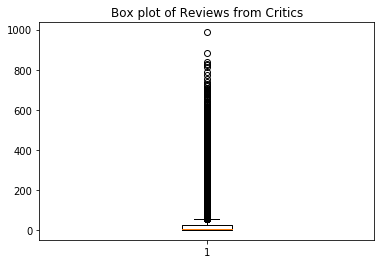

In [99]:
#Look for outliers
plt.boxplot(new_series)
plt.title("Box plot of Reviews from Critics")
plt.show()

In [5]:
#Without all variables but the 'duration'
new_series2 = movie_recs['duration'].dropna()

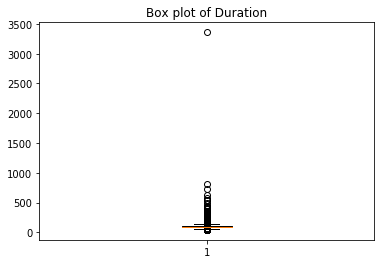

In [6]:
plt.boxplot(new_series2)
plt.title("Box plot of Duration")
plt.show()

In [7]:
#Setting a Thresshold
movie_recs[movie_recs.duration >= 200]

imdb_title_id                             title  \
58        tt0006206                      Les vampires   
74        tt0006886                             Judex   
129       tt0009701                          Tih Minh   
134       tt0009894                 El automóvil gris   
270       tt0013086           Dr. Mabuse, der Spieler   
...             ...                               ...   
79906     tt8020896             Da xiang xi di er zuo   
80177     tt8253606      Mektoub, My Love: Intermezzo   
80574     tt8672516                Antony & Cleopatra   
80875     tt9047474                           La flor   
80882     tt9055926  National Theatre Live: King Lear   

                         original_title  year date_published  \
58                         Les vampires  1915     1915-11-13   
74                                Judex  1916     1917-01-19   
129                            Tih Minh  1918     1919-02-07   
134                   El automóvil gris  1919     1919-12-11   
270             Dr. Mabuse, der Spieler  1922     1922-09-30   
...                                 ...   ...            ...   
79906             Da xiang xi di er zuo  2018     2018-11-15   
80177      Mektoub, My Love: Intermezzo  2019     2019-05-23   
80574                Antony & Cleopatra  2018     2018-12-06   
80875                           La flor  2018     2018-09-21   
80882  National Theatre Live: King Lear  2018     2018-09-27   

                          genre  duration    country  \
58     Action, Adventure, Crime       421     France   
74             Adventure, Crime       300     France   
129          Adventure, Mystery       418     France   
134               Action, Crime       223     Mexico   
270    Crime, Mystery, Thriller       242    Germany   
...                         ...       ...        ...   
79906                     Drama       230      China   
80177           Comedy, Romance       212     France   
80574                     Drama       220         UK   
80875   Drama, Fantasy, Musical       808  Argentina   
80882                     Drama       227         UK   

                                                language             director  \
58                                                French      Louis Feuillade   
74                                                French      Louis Feuillade   
129                                               French      Louis Feuillade   
134                                              Spanish        Enrique Rosas   
270                                               German           Fritz Lang   
...                                                  ...                  ...   
79906                                           Mandarin                Bo Hu   
80177                                             French  Abdellatif Kechiche   
80574                                            English         Simon Godwin   
80875  Spanish, French, English, Russian, German, Swe...       Mariano Llinás   
80882                                            English       Jonathan Munby   

       ... females_30age_avg_vote females_30age_votes females_45age_avg_vote  \
58     ...                    7.0               228.0                    7.9   
74     ...                    8.1                43.0                    8.1   
129    ...                    7.8                16.0                    7.6   
134    ...                    7.0                 3.0                    7.4   
270    ...                    7.8               317.0                    8.0   
...    ...                    ...                 ...                    ...   
79906  ...                    7.6                85.0                    7.9   
80177  ...                    1.6                11.0                    5.8   
80574  ...                    7.9                15.0                    6.1   
80875  ...                    6.3                 8.0                    8.0   
80882  ...                

In [101]:
#Without all variables but the 'females_allages_avg_vote'
new_series2 = movie_recs['females_allages_avg_vote'].dropna()

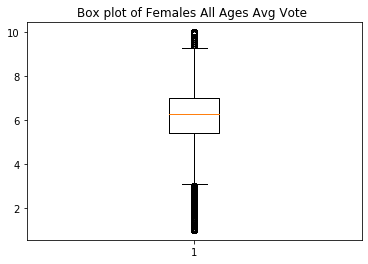

In [102]:
plt.boxplot(new_series2)
plt.title("Box plot of Females All Ages Avg Vote ")
plt.show()

In [100]:
movie_recs["reviews_from_critics"]

0         7.0
1         2.0
2         3.0
3        14.0
4         5.0
         ... 
81268     NaN
81269     NaN
81270     NaN
81271     NaN
81272     NaN
Name: reviews_from_critics, Length: 81273, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


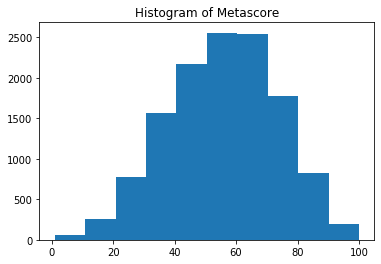

In [103]:
plt.hist(movie_recs["metascore"])
plt.title("Histogram of Metascore")
plt.show()

## Bivariate Analysis

In [104]:
movie_recs.corr()

year  duration  avg_vote     votes  metascore  \
year                       1.000000  0.150164 -0.213843  0.061409  -0.176244   
duration                   0.150164  1.000000  0.221752  0.111327   0.217760   
avg_vote                  -0.213843  0.221752  1.000000  0.164838   0.692214   
votes                      0.061409  0.111327  0.164838  1.000000   0.196126   
metascore                 -0.176244  0.217760  0.692214  0.196126   1.000000   
reviews_from_users         0.068079  0.117187  0.142879  0.792243   0.128114   
reviews_from_critics       0.145183  0.132651  0.198265  0.674826   0.239111   
weighted_average_vote     -0.213843  0.221752  1.000000  0.164838   0.692214   
total_votes                0.061409  0.111327  0.164838  1.000000   0.196126   
mean_vote                 -0.161050  0.230511  0.929883  0.141389   0.643122   
median_vote               -0.115183  0.221189  0.879101  0.117649   0.609879   
votes_10                   0.024455  0.090692  0.128908  0.857976   0.176689   
votes_9                    0.027099  0.093319  0.146461  0.913241   0.220571   
votes_8                    0.046853  0.107647  0.179134  0.959064   0.256547   
votes_7                    0.073636  0.109379  0.177995  0.908662   0.200413   
votes_6                    0.093132  0.094339  0.134779  0.785324   0.057078   
votes_5                    0.100533  0.080539  0.087207  0.700961  -0.055251   
votes_4                    0.102588  0.071393  0.049030  0.652204  -0.113157   
votes_3                    0.101460  0.066698  0.019654  0.628261  -0.133694   
votes_2                    0.097912  0.064303 -0.003243  0.610051  -0.131590   
votes_1                    0.084908  0.080524 -0.005214  0.598347  -0.042025   
allgenders_0age_avg_vote  -0.047238  0.196928  0.480238  0.098600   0.439340   
allgenders_0age_votes      0.070354  0.111309  0.155260  0.792241   0.160845   
allgenders_18age_avg_vote -0.197637  0.195763  0.855781  0.138499   0.669578   
allgenders_18age_votes     0.069181  0.102396  0.149949  0.982318   0.180656   
allgenders_30age_avg_vote -0.223173  0.201312  0.958724  0.155953   0.687562   
allgenders_30age_votes     0.063834  0.110382  0.166620  0.989385   0.189221   
allgenders_45age_avg_vote -0.236490  0.110461  0.778497  0.175745   0.672663   
allgenders_45age_votes     0.024946  0.123581  0.195100  0.946114   0.239815   
males_allages_avg_vote    -0.227667  0.219691  0.977743  0.169813   0.700080   
males_allages_votes        0.059946  0.111916  0.164941  0.995918   0.193739   
males_0age_avg_vote       -0.092842  0.204003  0.499076  0.108111   0.484956   
males_0age_votes           0.051797  0.107436  0.162537  0.811932   0.166488   
males_18age_avg_vote      -0.189619  0.203681  0.833812  0.138838   0.678962   
males_18age_votes          0.065203  0.104258  0.149423  0.983327   0.182049   
males_30age_avg_vote      -0.223864  0.204012  0.950325  0.158247   0.690843   
males_30age_votes          0.061740  0.110621  0.165326  0.984970   0.187154   
males_45age_avg_vote      -0.242709  0.101709  0.762958  0.177107   0.677587   
males_45age_votes          0.023461  0.123039  0.194024  0.942476   0.237153   
females_allages_avg_vote  -0.186018  0.157128  0.860993  0.140037   0.621407   
females_allages_votes      0.069809  0.098947  0.157643  0.936314   0.181135   
females_0age_avg_vote     -0.012058  0.193377  0.399679  0.108354   0.282315   
females_0age_votes         0.128131  0.123580  0.183584  0.651747   0.173150   
females_18age_avg_vote    -0.171103  0.117800  0.657659  0.096720   0.543485   
females_18age_votes        0.071189  0.085400  0.139657  0.888570   0.157163   
females_30age_avg_vote    -0.195557  0.147623  0.773037  0.117391   0.616772   
females_30age_votes        0.069781  0.102621  0.162431  0.941435   0.183841   
females_45age_avg_vote    -0.130119  0.101552  0.588271  0.120217   0.574681   
females_45age_votes        0.035010  0.128532  0.196566  0.926327   0.243426   
top1000_voters_rating     -0.27

In [8]:
#Applying a joint filter of 'duration and "genre"'
#or operator is the same as pipe | symbol
movie_recs[(movie_recs.duration >= 200) & (movie_recs.genre == 'Comedy')]

imdb_title_id            title   original_title  year date_published  \
22762     tt0093864    Rimini Rimini    Rimini Rimini  1987     1987-03-03   
69888     tt3732110  Jatt James Bond  Jatt James Bond  2014     2014-04-25   

        genre  duration country language         director  ...  \
22762  Comedy       210   Italy  Italian  Sergio Corbucci  ...   
69888  Comedy       220   India  Punjabi     Rohit Jugraj  ...   

      females_30age_avg_vote females_30age_votes females_45age_avg_vote  \
22762                    3.5                14.0                    4.1   
69888                    5.5                 2.0                    NaN   

      females_45age_votes  top1000_voters_rating  top1000_voters_votes  \
22762                13.0                    5.0                  25.0   
69888                 NaN                    7.4                   7.0   

      us_voters_rating us_voters_votes non_us_voters_rating  \
22762              4.9            22.0                  4.6   
69888              7.0            19.0                  6.6   

       non_us_voters_votes  
22762                384.0  
69888                214.0  

[2 rows x 70 columns]

In [9]:
#Alternative version of selection 'genre' by "or" | 
movie_recs[movie_recs.genre.isin(['Comedy','Drama','Romance'])]

imdb_title_id                             title  \
1         tt0001892                    Den sorte drøm   
8         tt0002461                       Richard III   
9         tt0002646                          Atlantis   
11        tt0003014                     Ingeborg Holm   
15        tt0003167                  Home, Sweet Home   
...             ...                               ...   
81259     tt9872556  Momenti di trascurabile felicità   
81262     tt9880982                     Dulce Familia   
81269     tt9905412                             Ottam   
81270     tt9905462                         Pengalila   
81271     tt9911774         Padmavyuhathile Abhimanyu   

                         original_title  year date_published   genre  \
1                        Den sorte drøm  1911     1911-08-19   Drama   
8                           Richard III  1912     1912-10-15   Drama   
9                              Atlantis  1913     1913-12-26   Drama   
11                        Ingeborg Holm  1913     1913-10-27   Drama   
15                     Home, Sweet Home  1914     1914-05-17   Drama   
...                                 ...   ...            ...     ...   
81259  Momenti di trascurabile felicità  2019     2019-03-14  Comedy   
81262                     Dulce Familia  2019     2019-05-10  Comedy   
81269                             Ottam  2019     2019-03-08   Drama   
81270                         Pengalila  2019     2019-03-08   Drama   
81271         Padmavyuhathile Abhimanyu  2019     2019-03-08   Drama   

       duration           country   language                      director  \
1            53  Germany, Denmark        NaN                     Urban Gad   
8            55       France, USA    English  André Calmettes, James Keane   
9           121           Denmark     Danish                   August Blom   
11           96            Sweden        NaN               Victor Sjöström   
15           55               USA    English                 D.W. Griffith   
...         ...               ...        ...                           ...   
81259        93             Italy    Italian              Daniele Luchetti   
81262       101     Mexico, Chile    Spanish                 Nicolás López   
81269       120             India  Malayalam                           Zam   
81270       111             India  Malayalam                 T.V. Chandran   
81271       130             India  Malayalam               Vineesh Aaradya   

       ... females_30age_avg_vote females_30age_votes females_45age_avg_vote  \
1      ...                    5.8                 4.0                    6.5   
8      ...                    7.2                 8.0                    9.7   
9      ...                    6.6                13.0                    8.1   
11     ...                    7.4                41.0                    8.0   
15     ...                    4.2                 5.0                    5.5   
...    ...                    ...                 ...                    ...   
81259  ...                    6.6                19.0                    6.5   
81262  ...                    5.6                 9.0                    8.0   
81269  ...                    NaN                 NaN                    NaN   
81270  ...                    NaN                 NaN                    NaN   
81271  ...                    NaN                 NaN                    NaN   

      females_45age_votes  top1000_voters_rating  top1000_voters_votes  \
1                     8.0                    5.9                  29.0   
8                     6.0                    5.3                  35.0   
9                    14.0                    6.3                  35.0   
11                   38.0                    6.9                  81.0   
15                    5.0                    5.4                  35.0   
...                   ...                    ...                   ...   
81259                 5.0               

In [10]:
movie_recs[movie_recs.language == 'Spanish']

imdb_title_id                             title  \
134       tt0009894                 El automóvil gris   
672       tt0019629                  La aldea maldita   
996       tt0021707                     Los calaveras   
1123      tt0022274                     Politiquerías   
1139      tt0022339                             Santa   
...             ...                               ...   
81099     tt9427166          Padre no hay más que uno   
81184     tt9648372  Breve historia del planeta verde   
81230     tt9789686                          Un rubio   
81250     tt9845398                      Fin de siglo   
81262     tt9880982                     Dulce Familia   

                         original_title  year date_published  \
134                   El automóvil gris  1919     1919-12-11   
672                    La aldea maldita  1930     1930-12-08   
996                       Los calaveras  1931     1931-04-19   
1123                      Politiquerías  1931     1931-05-01   
1139                              Santa  1932     1932-03-30   
...                                 ...   ...            ...   
81099          Padre no hay más que uno  2019     2019-08-01   
81184  Breve historia del planeta verde  2019     2019-02-11   
81230                          Un rubio  2019     2019-02-26   
81250                      Fin de siglo  2019     2019-08-16   
81262                     Dulce Familia  2019     2019-05-10   

                           genre  duration                            country  \
134                Action, Crime       223                             Mexico   
672                        Drama        57                              Spain   
996                       Comedy        63                                USA   
1123                      Comedy        56                                USA   
1139                       Drama        81                             Mexico   
...                          ...       ...                                ...   
81099                     Comedy        98                              Spain   
81184  Adventure, Drama, Fantasy        75  Argentina, Germany, Brazil, Spain   
81230             Drama, Romance       108                          Argentina   
81250                      Drama        84                          Argentina   
81262                     Comedy       101                      Mexico, Chile   

      language         director  ... females_30age_avg_vote  \
134    Spanish    Enrique Rosas  ...                    7.0   
672    Spanish      Florián Rey  ...                    7.5   
996    Spanish   James W. Horne  ...                    7.0   
1123   Spanish   James W. Horne  ...                    7.0   
1139   Spanish   Antonio Moreno  ...                    8.0   
...        ...              ...  ...                    ...   
81099  Spanish  Santiago Segura  ...                    6.7   
81184  Spanish    Santiago Loza  ...                    5.5   
81230  Spanish     Marco Berger  ...                    7.4   
81250  Spanish     Lucio Castro  ...                    7.1   
81262  Spanish    Nicolás López  ...                    5.6   

      females_30age_votes females_45age_avg_vote females_45age_votes  \
134                   3.0                    7.4                 6.0   
672                   7.0                    7.4                 7.0   
996                   1.0                    6.3                 6.0   
1123                  1.0                    5.8                 6.0   
1139                  8.0                    6.5                 4.0   
...                   ...                    ...                 ...   
81099                 9.0                    8.1                10.0   
81184                 8.0                    6.0                 3.0   
81230                 9.0                    6.3                 6.0   
81250                 5.0                    7.3                 5.0   
81262                 9.0     

In [11]:
movie_recs[movie_recs.language == 'Spanish'].country.value_counts()

Spain                               844
Mexico                              494
Argentina                           329
Chile                                85
Colombia                             61
                                   ... 
Chile, Peru                           1
Argentina, Mexico, France             1
Argentina, Netherlands, France        1
Argentina, Venezuela                  1
Peru, Argentina, France, Germany      1
Name: country, Length: 332, dtype: int64

In [13]:
#Movies in English by percentage in country.
movie_recs[movie_recs.language == 'English'].country.value_counts(normalize=True)

USA                                         0.694957
UK                                          0.097391
Canada                                      0.034580
Australia                                   0.019072
UK, USA                                     0.014696
                                              ...   
Ireland, Germany, USA                       0.000029
Hong Kong, France                           0.000029
Spain, Ireland, France                      0.000029
USA, France, UK, Austria, Germany, Italy    0.000029
Canada, Japan, USA                          0.000029
Name: country, Length: 1235, dtype: float64

In [14]:
#top languages of movies in Spain, another film center.
movie_recs[movie_recs.country == 'Spain'].language.value_counts(normalize=True)

Spanish                                      0.742958
Spanish, English                             0.035211
English                                      0.033451
Spanish, Catalan                             0.019366
Catalan, Spanish                             0.015845
                                               ...   
English, Nepali                              0.000880
Chinese, English, Spanish                    0.000880
Spanish, English, German, French, Catalan    0.000880
Spanish, English, Latin                      0.000880
Spanish, Basque, English                     0.000880
Name: language, Length: 97, dtype: float64

In [15]:
#top languages of movies in Spain, another film center.
movie_recs[movie_recs.country == 'France'].language.value_counts(normalize=True)

French                              0.797425
French, English                     0.059959
French, German                      0.009146
French, Arabic                      0.009146
English                             0.008808
                                      ...   
French, English, Chinese            0.000339
French, English, Spanish, Arabic    0.000339
French, English, Hungarian          0.000339
French, Korean                      0.000339
French, English, German, Nepali     0.000339
Name: language, Length: 188, dtype: float64

In [17]:
#Groupby genre and female reviews
movie_recs.groupby('genre').females_allages_avg_vote.value_counts(normalize=True)

genre            females_allages_avg_vote
Action           6.0                         0.043415
                 5.5                         0.031838
                 5.9                         0.027496
                 6.4                         0.027496
                 4.7                         0.026049
                                               ...   
Western, Drama   4.6                         0.250000
                 6.3                         0.250000
                 7.6                         0.250000
Western, Family  7.2                         1.000000
Western, Horror  3.9                         1.000000
Name: females_allages_avg_vote, Length: 14975, dtype: float64

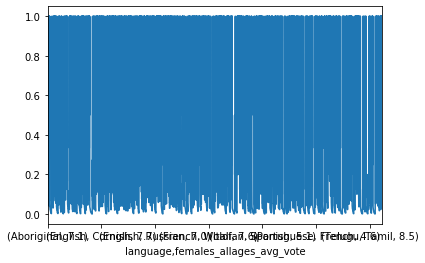

In [43]:
#Groupby language and female reviews
movie_recs.groupby('language').females_allages_avg_vote.value_counts(normalize=True).plot()

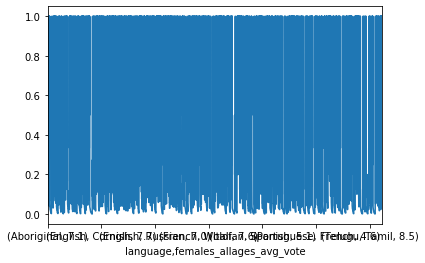

In [42]:
movie_recs.groupby('language').females_allages_avg_vote.value_counts(normalize=True).plot()

In [20]:
#Groupby language and female reviews
movie_recs.groupby('females_allages_avg_vote').language.value_counts(normalize=True).loc[:,'English']

females_allages_avg_vote
1.0     0.367188
1.1     0.769231
1.2     0.684211
1.3     0.586957
1.4     0.750000
          ...   
9.6     0.500000
9.7     0.352941
9.8     0.571429
9.9     0.375000
10.0    0.351351
Name: language, Length: 91, dtype: float64

In [163]:
movie_recs['genre'].dtype

dtype('O')

### Visualizing Categorical Variables
Possible, but unnecessary in creating a wordcloud.

#### Plot counts for each combination of genres.
sns.countplot(y="females_allages_avg_vote", hue="genre", data=movie_recs, palette="Greens_d")
plt.show()

Text(0.5, 1.0, "Metascore vs Top 1,000 Voters' Ratings")

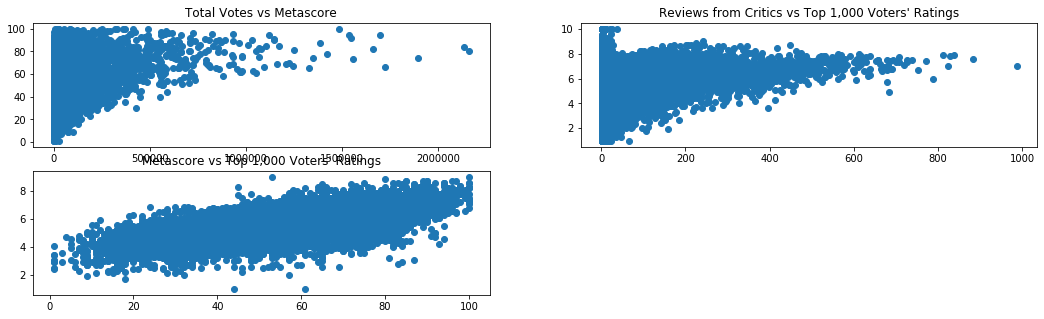

In [110]:
#Bivariate Analysis of 2 continuous variables: total_votes, metascore, top1000_voters_rating',"reviews_from_critics"
for i in range(0, len(movie_recs.total_votes)):
    if pd.isnull(movie_recs.total_votes[i]):
        movie_recs.total_votes[i] = movie_recs.total_votes[i-1]
        
plt.figure(figsize=(18,5))

plt.subplot(2,2,1)
plt.scatter(movie_recs["total_votes"], movie_recs["metascore"])
plt.title("Total Votes vs Metascore")

plt.subplot(2,2,2)
plt.scatter(movie_recs["reviews_from_critics"], movie_recs["top1000_voters_rating"])
plt.title("Reviews from Critics vs Top 1,000 Voters' Ratings")

plt.subplot(2,2,3)
plt.scatter(movie_recs["metascore"], movie_recs["top1000_voters_rating"])
plt.title("Metascore vs Top 1,000 Voters' Ratings")

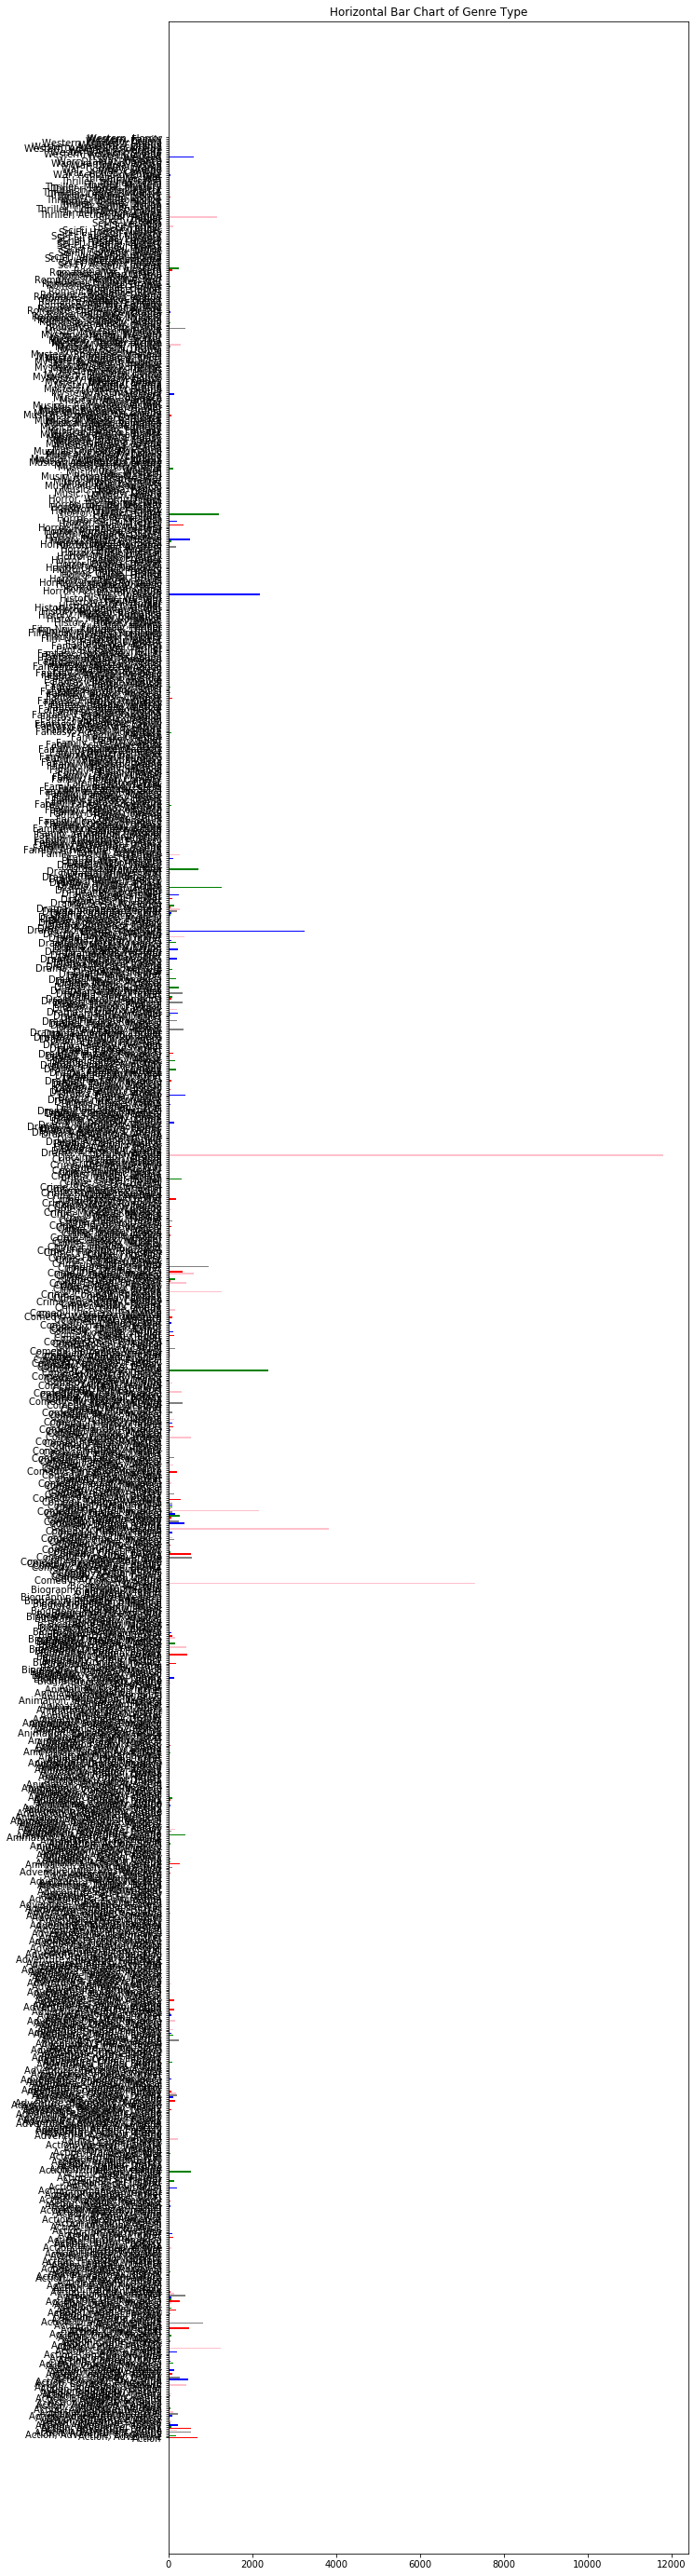

In [111]:
# bar chart of categorical variable 'genre'
plt.figure(figsize=(10,50))
plt.barh(movie_recs.groupby("genre")["genre"].count().index, 
        movie_recs.groupby("genre")["genre"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("Horizontal Bar Chart of Genre Type")

plt.show()

## Genre Encoding


In [112]:
#Create a new column w/new genre list encoded as a list
movie_recs['genre_as_list'] = movie_recs['genre'].str.split(', ')

In [113]:
#addresses list through Counter.
#Counter is a dictionary
#https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter
counter = Counter()
_ = movie_recs['genre_as_list'].apply(lambda row: counter.update(row))

In [114]:
for genre in counter.keys():
    movie_recs['is_' + genre.lower()] = movie_recs['genre_as_list'].apply(lambda x: genre in x).astype(int)

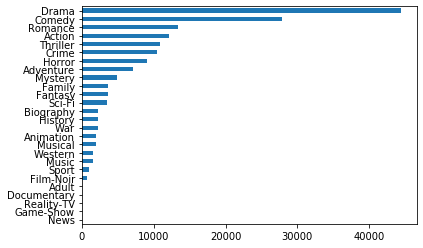

In [115]:
pd.Series(counter).sort_values(ascending=True).plot(kind='barh')

#Each movie will show up in simultaneous genre categories

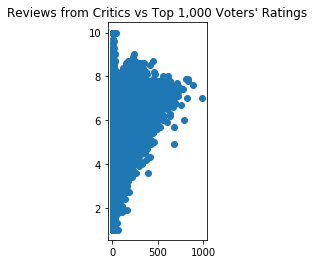

In [116]:
plt.subplot(1,3,1)
plt.scatter(movie_recs["reviews_from_critics"], movie_recs["top1000_voters_rating"])
plt.title("Reviews from Critics vs Top 1,000 Voters' Ratings")
plt.show()

### Bivariate Analysis: Categorical vs. Continuous

In [117]:
#Convert list to String
#data['Title'] = data['Title'].apply(lambda x: x.strip())
#movie_recs['genre_as_list'] to movie_recs['genre_1']

movie_recs['genre_1'] = movie_recs['genre_as_list'].map(lambda x: 'str'.join(x) ) #Need to convert every element to string values to read

In [118]:
movie_recs['genre_1']

0          BiographystrCrimestrDrama
1                              Drama
2                    DramastrHistory
3        AdventurestrDramastrFantasy
4                  BiographystrDrama
                    ...             
81268              HorrorstrThriller
81269                          Drama
81270                          Drama
81271                          Drama
81272                 DramastrFamily
Name: genre_1, Length: 81273, dtype: object

In [119]:
#Dummy Variables
columns_with_is = [x for x in movie_recs.columns if 'is_' in x]
columns_with_is_and_female_avg_vote = [x for x in movie_recs.columns if 'is_' in x or 'females_allages_avg_vote' in x]


In [120]:
columns_with_is

['is_biography',
 'is_crime',
 'is_drama',
 'is_history',
 'is_adventure',
 'is_fantasy',
 'is_romance',
 'is_war',
 'is_mystery',
 'is_horror',
 'is_western',
 'is_comedy',
 'is_family',
 'is_action',
 'is_sci-fi',
 'is_thriller',
 'is_sport',
 'is_animation',
 'is_musical',
 'is_music',
 'is_film-noir',
 'is_adult',
 'is_documentary',
 'is_reality-tv',
 'is_game-show',
 'is_news']

In [121]:
#Try groupby
movie_recs.groupby('females_allages_avg_vote')[columns_with_is].sum()

is_biography  is_crime  is_drama  is_history  \
females_allages_avg_vote                                                 
1.0                                  4        11        56           2   
1.1                                  0         5         3           0   
1.2                                  0         3        11           1   
1.3                                  0         5        15           0   
1.4                                  0         6         8           1   
...                                ...       ...       ...         ...   
9.6                                  1         1        11           0   
9.7                                  1         1        11           1   
9.8                                  0         3         9           0   
9.9                                  4         2        13           3   
10.0                                 1        16        55           0   

                          is_adventure  is_fantasy  is_romance  is_war  \
females_allages_avg_vote                                                 
1.0                                  7           4          13       1   
1.1                                  3           5           4       0   
1.2                                  4           3           3       0   
1.3                                  5           4           1       1   
1.4                                  7           1           3       1   
...                                ...         ...         ...     ...   
9.6                                  0           1           3       0   
9.7                                  1           0           2       0   
9.8                                  0           0           4       0   
9.9                                  1           0           1       0   
10.0                                 3           2          10       0   

                          is_mystery  is_horror  ...  is_sport  is_animation  \
females_allages_avg_vote                         ...                           
1.0                                2         11  ...         0             1   
1.1                                0          6  ...         0             0   
1.2                                0          6  ...         2             1   
1.3                                1          7  ...         0             1   
1.4                                1          8  ...         0             1   
...                              ...        ...  ...       ...           ...   
9.6                                1          1  ...         0             0   
9.7                                0          1  ...         0             0   
9.8                                0          0  ...         2             0   
9.9                                0          1  ...         0             0   
10.0                               4          9  ...         3             0   

                          is_musical  is_music  is_film-noir  is_adult  \
females_allages_avg_vote                                                 
1.0                                1         0             0         0   
1.1                                1         0             0         0   
1.2                                0         1             0         0   
1.3                                0         1             0         0   
1.4                                1         0             0         0   
...                              ...       ...           ...       ...   
9.6                                0         0             0         0   
9.7                                0         0             0         0   
9.8                                0         0             0         0   
9.9                                0         1             0         0   
10.0                               1         0             0         0   

                          is_documentary  is_reality-tv  is_game-show  is_news  
females_allages

### Visual: Genre Groupings

### Observation: 
Plot counts for newly reduced and reclassified combo of genre were unweildly since the genre and subgenre overlap to that extent that there needs to be a better way to visualize difference. Clustering will help. 


In [122]:
movie_recs["females_allages_avg_vote"].head()

0    6.1
1    5.7
2    5.8
3    7.2
4    5.4
Name: females_allages_avg_vote, dtype: float64

In [37]:
movie_recs['females_allages_avg_vote']

0        6.1
1        5.7
2        5.8
3        7.2
4        5.4
        ... 
81268    5.8
81269    NaN
81270    NaN
81271    NaN
81272    1.0
Name: females_allages_avg_vote, Length: 81273, dtype: float64

In [123]:
movie_recs[columns_with_is_and_female_avg_vote].corr()['females_allages_avg_vote']

females_allages_avg_vote    1.000000
is_biography                0.093994
is_crime                    0.025267
is_drama                    0.265728
is_history                  0.075557
is_adventure               -0.009797
is_fantasy                 -0.016627
is_romance                  0.073788
is_war                      0.063533
is_mystery                 -0.008838
is_horror                  -0.280769
is_western                  0.007952
is_comedy                  -0.014305
is_family                   0.023692
is_action                  -0.106021
is_sci-fi                  -0.121616
is_thriller                -0.127379
is_sport                    0.013370
is_animation                0.053703
is_musical                  0.043161
is_music                    0.044936
is_film-noir                0.055969
is_adult                   -0.004827
is_documentary              0.005833
is_reality-tv              -0.003357
is_game-show               -0.000944
is_news                     0.007894
N

In [124]:
#Looking at just "Romance" correlation
movie_recs[columns_with_is].corr()['is_romance']

is_biography     -0.040332
is_crime         -0.115037
is_drama          0.065334
is_history       -0.021889
is_adventure     -0.080447
is_fantasy       -0.037653
is_romance        1.000000
is_war           -0.004228
is_mystery       -0.065142
is_horror        -0.136368
is_western       -0.010511
is_comedy         0.090908
is_family        -0.064211
is_action        -0.123185
is_sci-fi        -0.071497
is_thriller      -0.130436
is_sport         -0.008284
is_animation     -0.063644
is_musical        0.076247
is_music          0.014291
is_film-noir     -0.030083
is_adult         -0.002202
is_documentary   -0.002202
is_reality-tv    -0.002202
is_game-show     -0.001557
is_news          -0.001557
Name: is_romance, dtype: float64

In [41]:
movie_recs[columns_with_is].corr()[['is_romance','is_news']]

is_romance   is_news
is_biography     -0.040332 -0.000595
is_crime         -0.115037 -0.001348
is_drama          0.065334 -0.003850
is_history       -0.021889 -0.000582
is_adventure     -0.080447 -0.001084
is_fantasy       -0.037653 -0.000755
is_romance        1.000000 -0.001557
is_war           -0.004228 -0.000581
is_mystery       -0.065142  0.013941
is_horror        -0.136368 -0.001241
is_western       -0.010511 -0.000492
is_comedy         0.090908 -0.002534
is_family        -0.064211 -0.000765
is_action        -0.123185 -0.001468
is_sci-fi        -0.071497 -0.000741
is_thriller      -0.130436  0.008954
is_sport         -0.008284 -0.000393
is_animation     -0.063644 -0.000560
is_musical        0.076247 -0.000556
is_music          0.014291 -0.000492
is_film-noir     -0.030083 -0.000319
is_adult         -0.002202 -0.000017
is_documentary   -0.002202 -0.000017
is_reality-tv    -0.002202 -0.000017
is_game-show     -0.001557 -0.000012
is_news          -0.001557  1.000000

### Bivariate Analsysis: Categorical vs. Categorical 

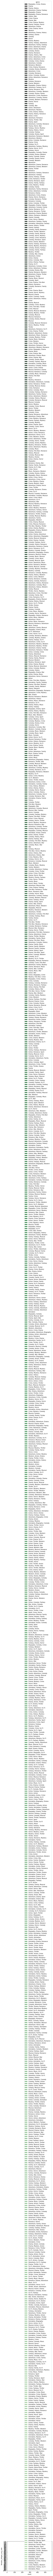

In [46]:
#Plot counts for each combination of genres.
sns.countplot(y="females_allages_avg_vote", hue="genre", data=movie_recs, palette="Greens_d") 
plt.show()

### Crosstab

In [125]:
#Attempt 2 crosstabl
#movie_recs2 = pd.crosstab(movie_recs[[is)comed]], movie_recs["director"])  
pd.crosstab(movie_recs['is_drama'], movie_recs['females_allages_avg_vote'])

females_allages_avg_vote  1.0   1.1   1.2   1.3   1.4   1.5   1.6   1.7   \
is_drama                                                                   
0                           74    23    27    32    38    37    38    55   
1                           56     3    11    15     8    24     9    27   

females_allages_avg_vote  1.8   1.9   ...  9.1   9.2   9.3   9.4   9.5   9.6   \
is_drama                              ...                                       
0                           70    82  ...    14    17    21     6    12     2   
1                           19    22  ...    20    28    24    20    18    11   

females_allages_avg_vote  9.7   9.8   9.9   10.0  
is_drama                                          
0                            6     5     4    58  
1                           11     9    13    55  

[2 rows x 91 columns]

In [126]:
pd.crosstab(movie_recs['is_drama'], movie_recs['females_allages_avg_vote'])

females_allages_avg_vote  1.0   1.1   1.2   1.3   1.4   1.5   1.6   1.7   \
is_drama                                                                   
0                           74    23    27    32    38    37    38    55   
1                           56     3    11    15     8    24     9    27   

females_allages_avg_vote  1.8   1.9   ...  9.1   9.2   9.3   9.4   9.5   9.6   \
is_drama                              ...                                       
0                           70    82  ...    14    17    21     6    12     2   
1                           19    22  ...    20    28    24    20    18    11   

females_allages_avg_vote  9.7   9.8   9.9   10.0  
is_drama                                          
0                            6     5     4    58  
1                           11     9    13    55  

[2 rows x 91 columns]

In [127]:
movie_recs[columns_with_is]

is_biography  is_crime  is_drama  is_history  is_adventure  is_fantasy  \
0                 1         1         1           0             0           0   
1                 0         0         1           0             0           0   
2                 0         0         1           1             0           0   
3                 0         0         1           0             1           1   
4                 1         0         1           0             0           0   
...             ...       ...       ...         ...           ...         ...   
81268             0         0         0           0             0           0   
81269             0         0         1           0             0           0   
81270             0         0         1           0             0           0   
81271             0         0         1           0             0           0   
81272             0         0         1           0             0           0   

       is_romance  is_war  is_mystery  is_horror  ...  is_sport  is_animation  \
0               0       0           0          0  ...         0             0   
1               0       0           0          0  ...         0             0   
2               0       0           0          0  ...         0             0   
3               0       0           0          0  ...         0             0   
4               0       0           0          0  ...         0             0   
...           ...     ...         ...        ...  ...       ...           ...   
81268           0       0           0          1  ...         0             0   
81269           0       0           0          0  ...         0             0   
81270           0       0           0          0  ...         0             0   
81271           0       0           0          0  ...         0             0   
81272           0       0           0          0  ...         0             0   

       is_musical  is_music  is_film-noir  is_adult  is_documentary  \
0               0         0             0         0               0   
1               0         0             0         0               0   
2               0         0             0         0               0   
3               0         0             0         0               0   
4               0         0             0         0               0   
...           ...       ...           ...       ...             ...   
81268           0         0             0         0               0   
81269           0         0             0         0               0   
81270           0         0             0         0               0   
81271           0         0             0         0               0   
81272           0         0             0         0               0   

       is_reality-tv  is_game-show  is_news  
0                  0             0        0  
1                  0             0        0  
2                  0             0        0  
3                  0             0        0  
4                  0             0        0  
...              ...           ...      ...  
81268              0             0        0  
81269              0             0        0  
81270              0             0        0  
81271              0             0        0  
81272              0             0        0  

[81273 rows x 26 columns]

In [128]:
movie_recs['director']

0                               Charles Tait
1                                  Urban Gad
2                         Charles L. Gaskill
3        Francesco Bertolini, Adolfo Padovan
4                              Sidney Olcott
                        ...                 
81268                        Aswani Kumar V.
81269                                    Zam
81270                          T.V. Chandran
81271                        Vineesh Aaradya
81272                      Ahmet Faik Akinci
Name: director, Length: 81273, dtype: object

Analysis: There are over 1,000 genre values. This variable is overwhelming, so we must reclassify to manage the values better. 

### Continuous vs. Categorical T-test

In [ ]:
#Test whether group differences are significant.
genre_type = movie_recs["genre"].unique()
grouped_df = movie_recs.groupby("genre")
for var in ["females_allages_avg_vote", "reviews_from_critics", "top1000_voters_rating"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(genre_type)):
        for j in range(i+1, len(genre_type)):
            print("t-test between groups {0} and {1}:".format(genre_type[i], genre_type[j]))
            print(stats.ttest_ind(
                movie_recs[movie_recs["genre"]==genre_type[i]][var], 
                movie_recs[movie_recs["genre"]==genre_type[j]][var]
            ))

### Heatmaps

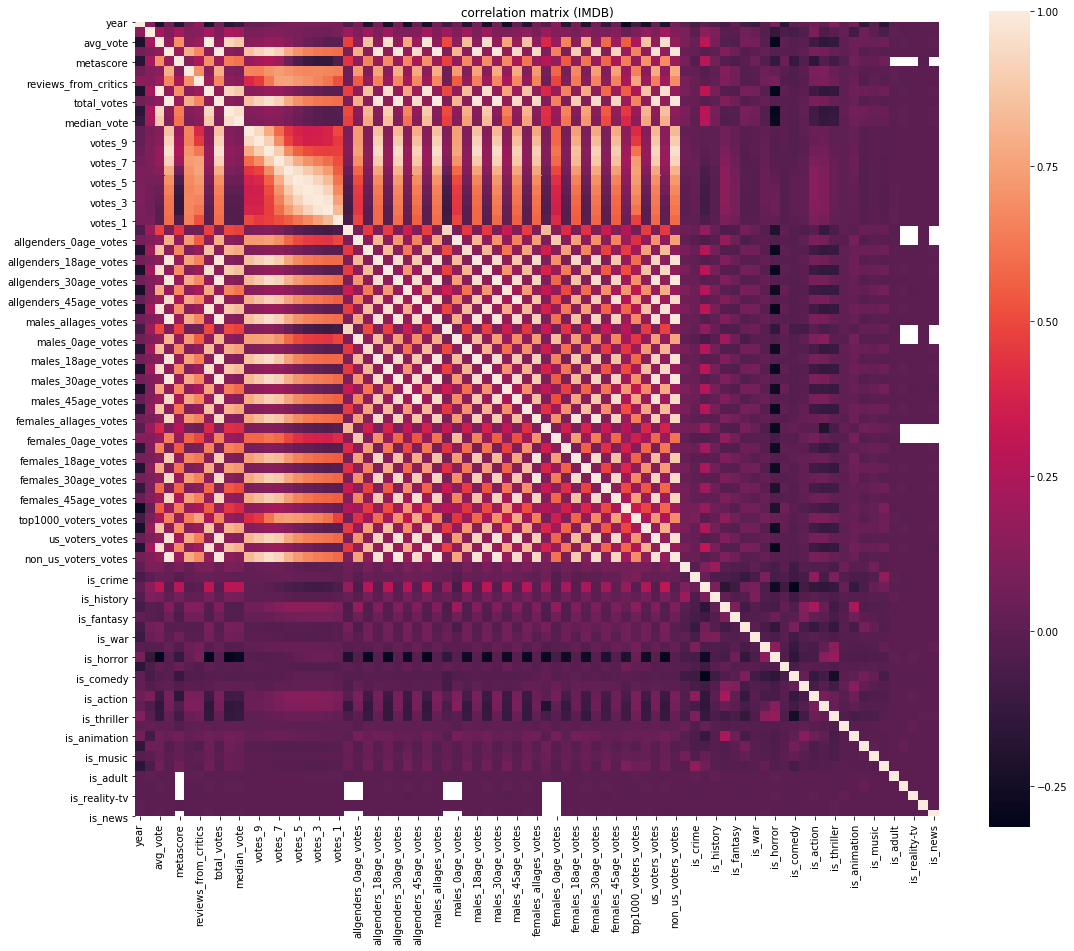

In [131]:
# make the correlation matrices.
corrmat_movie_recs = movie_recs.corr()

#corrmat_student = student_df.corr()

plt.figure(figsize=(18,15))

#plt.subplot(1,2,1) = (amount of rows, amount of columns, order of that graph)
# draw the heatmap using seaborn.
#sns.heatmap(corrmat_movie_recs, square=True, annot=True, linewidths=.9)
sns.heatmap(corrmat_movie_recs, square=True)
plt.title("correlation matrix (IMDB)")

plt.show()

## Principal Component Analysis: PCA
Reduce features as linear combinations of the original variables. First mean normalize the observations within dataset.  Please refer to second Notebook: Capstone 3_Unsupervised Learning-PCA for analysis of our features in two and three dimensions for similarity models to be used in clustering. 

In [132]:
movie_recs.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes'

## Model Preparation:
For our model preparation before applying PCA, we will drop a variety of columns that are not representing women's votes, scores, or reviews because our question for movie recs is centered around women viewers. We are guessing that they represent a huge, diverse group that skews towards family-friendly movies that are more popular and palatable for foreign audiences. We formed this question based on the fact that women tend to bring their children to movie theaters, and therefore do more vetting of movies prior to purchasing tickets. Since they are bringing children, they tend to screen movies for violence, adult content, nudity and sexuality, as well as language.  

Then we will apply a multi-label encoder to address the remaining categorical variables.

In [133]:
# To Drop: 'year', 'date_published','genre', 'duration','production_company', 'actors', 
       #'budget', 'usa_gross_income', 'worlwide_gross_income', 
       #'reviews_from_users', 'reviews_from_critics', 
       #'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       #'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       #'votes_2', 'votes_1',
movie_recs_to_look = movie_recs[movie_recs['language']=='English'].dropna()
movie_recs_to_cluster = movie_recs_to_look.drop(columns=['description','imdb_title_id', 'title', 
                                                         'original_title', 'date_published','duration', 'budget',
                                                         'usa_gross_income', 'worlwide_gross_income',
                                                         'reviews_from_users', 'reviews_from_critics', 'genre', 
                                                         'genre_as_list','avg_vote', 'votes','weighted_average_vote',
                                                         'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
                                                         'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
                                                         'votes_2', 'votes_1', 'allgenders_0age_avg_vote','allgenders_0age_votes', 'allgenders_18age_avg_vote',
                                                         'allgenders_18age_votes', 'allgenders_30age_avg_vote',
                                                         'allgenders_30age_votes', 'allgenders_45age_avg_vote',
                                                         'allgenders_45age_votes', 'males_allages_avg_vote',
                                                         'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
                                                         'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
                                                         'males_30age_votes', 'males_45age_avg_vote', 'males_45age_votes'])
movie_recs_to_cluster = movie_recs_to_cluster[movie_recs_to_cluster['language'] == 'English'].drop(columns='language')


In [134]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X = oe.fit_transform(movie_recs_to_cluster)

#### Analysis: 
Note our dilemma of double and triple genre groupings create separate 'genre' listings apart from the one word value "drama", or "comedy", and "romance" to create additional genres of "drama-romance" and "comedy-romance" in producing five values rather than three.

We will select 'Avengers' as our movie to walk through each of our clustering models (minibatch k-means, dbscan, and agglomerative) to compare and contrast internal results for recommendations. If the overlap in subgenre is close, similar movie recommendations will pop up across our predicted rows. 

In [165]:
### Find the title 
movie_recs_to_look[movie_recs_to_look.title.str.contains('Avengers')]

imdb_title_id                   title          original_title  year  \
71242     tt4154756  Avengers: Infinity War  Avengers: Infinity War  2018   

      date_published                      genre  duration country language  \
71242     2018-04-26  Action, Adventure, Sci-Fi       149     USA  English   

                       director  ... is_film-noir is_adult is_documentary  \
71242  Anthony Russo, Joe Russo  ...            0        0              0   

      is_reality-tv  is_game-show  is_news                      genre_1  \
71242             0             0        0  ActionstrAdventurestrSci-Fi   

      minibatch_kmeans_labels dbscan_recs  agg_cluster_labels  
71242                      13          -1                  14  

[1 rows x 101 columns]

In [135]:
from sklearn import cluster
kmeans = cluster.MiniBatchKMeans(n_clusters=250)

kmeans.fit(X)

MiniBatchKMeans(n_clusters=250)

In [137]:
# for_modeling['minibatch_kmeans_labels'] = kmeans.labels_
movie_recs_to_look['minibatch_kmeans_labels'] = kmeans.labels_
#Will show labels 

#### Observation of Mini Batch K-Means Cluster: 
Our Mini Batch K-Means clustering model identified 250 clusters after running our MiniBatchKMeans clustering model. As such, we identified 4 films that clustered around our selected movie title listed as record '128'. 
They include: "Barnyard", "Winnie the Pooh", "Peter Rabbit" as well as "Ride Along 2".
These first three fall into "Amination, Adventure, Comedy" genre while the last selection, "Ride Along 2", falls into an adjacent genre of 'Action, Comedy, Crime' but within the same cluster. 

In [138]:
movie_recs_to_look[movie_recs_to_look['minibatch_kmeans_labels']==128]

imdb_title_id            title   original_title  year date_published  \
44393     tt0414853         Barnyard         Barnyard  2006     2006-10-20   
56036     tt1449283  Winnie the Pooh  Winnie the Pooh  2011     2011-04-15   
66478     tt2869728     Ride Along 2     Ride Along 2  2016     2016-01-22   
74012     tt5117670     Peter Rabbit     Peter Rabbit  2018     2018-03-16   

                              genre  duration                    country  \
44393  Animation, Adventure, Comedy        90  USA, Germany, Netherlands   
56036  Animation, Adventure, Comedy        63                        USA   
66478         Action, Comedy, Crime       102                        USA   
74012  Animation, Adventure, Comedy        95             USA, Australia   

      language                       director  ... is_musical is_music  \
44393  English                 Steve Oedekerk  ...          0        0   
56036  English  Stephen J. Anderson, Don Hall  ...          0        0   
66478  English                      Tim Story  ...          0        0   
74012  English                     Will Gluck  ...          0        0   

      is_film-noir is_adult  is_documentary  is_reality-tv is_game-show  \
44393            0        0               0              0            0   
56036            0        0               0              0            0   
66478            0        0               0              0            0   
74012            0        0               0              0            0   

      is_news                         genre_1  minibatch_kmeans_labels  
44393       0  AnimationstrAdventurestrComedy                      128  
56036       0  AnimationstrAdventurestrComedy                      128  
66478       0         ActionstrComedystrCrime                      128  
74012       0  AnimationstrAdventurestrComedy                      128  

[4 rows x 99 columns]

In [168]:
movie_recs_to_look[movie_recs_to_look['minibatch_kmeans_labels'] == 13]

imdb_title_id                                            title  \
26693     tt0107614                                   Mrs. Doubtfire   
28459     tt0114369                                            Se7en   
40961     tt0327056                                     Mystic River   
43927     tt0401729                                      John Carter   
55015     tt1343092                                 The Great Gatsby   
57585     tt1596363                                    The Big Short   
58024     tt1637688                                          In Time   
59108     tt1727824                                Bohemian Rhapsody   
65432     tt2562232  Birdman or (The Unexpected Virtue of Ignorance)   
66272     tt2798920                                     Annihilation   
70072     tt3783958                                       La La Land   
71242     tt4154756                           Avengers: Infinity War   
73595     tt4975722                                        Moonlight   

                                        original_title  year date_published  \
26693                                   Mrs. Doubtfire  1993     1994-01-28   
28459                                            Se7en  1995     1996-01-05   
40961                                     Mystic River  2003     2003-10-24   
43927                                      John Carter  2012     2012-03-09   
55015                                 The Great Gatsby  2013     2013-05-16   
57585                                    The Big Short  2015     2016-01-22   
58024                                          In Time  2011     2011-11-01   
59108                                Bohemian Rhapsody  2018     2018-10-24   
65432  Birdman or (The Unexpected Virtue of Ignorance)  2014     2015-01-02   
66272                                     Annihilation  2018     2018-02-23   
70072                                       La La Land  2016     2017-01-12   
71242                           Avengers: Infinity War  2018     2018-04-26   
73595                                        Moonlight  2016     2017-02-24   

                           genre  duration         country language  \
26693      Comedy, Drama, Family       125             USA  English   
28459      Crime, Drama, Mystery       127             USA  English   
40961      Crime, Drama, Mystery       138  USA, Australia  English   
43927  Action, Adventure, Sci-Fi       132             USA  English   
55015             Drama, Romance       143  Australia, USA  English   
57585   Biography, Comedy, Drama       130             USA  English   
58024   Action, Sci-Fi, Thriller       109             USA  English   
59108    Biography, Drama, Music       134         UK, USA  English   
65432              Comedy, Drama       119             USA  English   
66272   Adventure, Drama, Horror       115         UK, USA  English   
70072       Comedy, Drama, Music       128  USA, Hong Kong  English   
71242  Action, Adventure, Sci-Fi       149             USA  English   
73595                      Drama       111             USA  English   

                       director  ... is_film-noir is_adult is_documentary  \
26693            Chris Columbus  ...            0        0              0   
28459             David Fincher  ...            0        0              0   
40961            Clint Eastwood  ...            0        0              0   
43927            Andrew Stanton  ...            0        0              0   
55015              Baz Luhrmann  ...            0        0              0   
57585                Adam McKay  ...            0        0              0   
58024             Andrew Niccol  ...            0        0              0   
59108              Bryan Singer  ...            0        0              0   
65432     Alejandro G. Iñárritu  ...            0        0              0   
66272              Alex Garland  ...            0        0              0   
70072           Damien Chazelle  ...            

### Form Cluster 1: MiniBatch K-Means
The similarity model, MiniBatch K-Means is a simpler version of the clustering model that does not need a ton of computational time. If we don't want to reduce dimensions, this first cluster of MiniBatch K-means will provide some movie title recommendations below. 

In this cluster using MiniBatch K-Means, we see 13 films sharing the same cluster. However, the cluster is weak given that a family-comedy like "Mrs. Doubtfire" was grouped with a non-family, violent, crime drama like "Se7en". As such, the overarching category of 'drama' may have been the driving feature for this clustering model.

Now we will run two other similarity models with the Principal Component Analysis as our features for clustering. These are: 1) DBSCAN, and 2) Aglommerative Clustering and will show differnt movie title recommendations that we will compare and contrast. 

In [139]:
print(movie_recs_to_cluster.shape)
print(movie_recs_to_look.shape)
print(X.shape)
print(kmeans.labels_.shape)

(2409, 50)
(2409, 99)
(2409, 50)
(2409,)


### Note: 
The DBSCAN cluster produced an array of clusters that only had 1 value in each cluster. This will not produce a recommendation based on parameters. For DBSCAN, we had to adjust our eps to '200' and hold constant our mini-samples at '2' to produce some clusters. (We tried to increase our mini-samples from '2' to '5', but we still got a single array.) Even with the 11 clusters from DBSCAN, we could not achieve a result showing films for record '128' in the group. 

Therefore, based on the results of our models above and below using Mini-Batch K-Means, DBSCAN, and Aglommerative clustering without PCA, we will compare to clustered models that will hypterune our parameters through feature engineering using Principal Compoenent Analysis. This will be found in our PCA Jupyter Notebook. 

## Form Cluster 2: DBSCAN Cluster

In [140]:
from sklearn.cluster import DBSCAN
#Our 'X' was defined earlier as. 
        #X = oe.fit_transform(movie_recs_to_cluster)

dbscan_recs = DBSCAN(eps=.3, min_samples=2).fit(X)

print(dbscan_recs.labels_)

#dbscan_recs

[-1 -1 -1 ... -1 -1 -1]


In [141]:
print(set(dbscan_recs.labels_))

{-1}


In [142]:
from sklearn.cluster import DBSCAN
#Our 'X' was defined earlier as. 
        #X = oe.fit_transform(movie_recs_to_cluster)

dbscan_recs = DBSCAN(eps=3, min_samples=5).fit(X)

print(dbscan_recs.labels_)

[-1 -1 -1 ... -1 -1 -1]


In [153]:
from sklearn.cluster import DBSCAN
#Our 'X' was defined earlier as. 
        #X = oe.fit_transform(movie_recs_to_cluster)

dbscan_recs = DBSCAN(eps=200, min_samples=2).fit(X)

print(set(dbscan_recs.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1}


DBSCAN only produces 11 clusters. This cluster did not work.

In [ ]:
X

In [154]:
#Recommeding based on DBSCAN
# for_modeling['dbscan_recs.labels_'] = dbscan_recs.labels_
movie_recs_to_look['dbscan_recs'] = dbscan_recs.labels_

In [155]:
movie_recs_to_look[movie_recs_to_look['dbscan_recs']==128]

Empty DataFrame
Columns: [imdb_title_id, title, original_title, year, date_published, genre, duration, country, language, director, writer, production_company, actors, description, avg_vote, votes, budget, usa_gross_income, worlwide_gross_income, metascore, reviews_from_users, reviews_from_critics, weighted_average_vote, total_votes, mean_vote, median_vote, votes_10, votes_9, votes_8, votes_7, votes_6, votes_5, votes_4, votes_3, votes_2, votes_1, allgenders_0age_avg_vote, allgenders_0age_votes, allgenders_18age_avg_vote, allgenders_18age_votes, allgenders_30age_avg_vote, allgenders_30age_votes, allgenders_45age_avg_vote, allgenders_45age_votes, males_allages_avg_vote, males_allages_votes, males_0age_avg_vote, males_0age_votes, males_18age_avg_vote, males_18age_votes, males_30age_avg_vote, males_30age_votes, males_45age_avg_vote, males_45age_votes, females_allages_avg_vote, females_allages_votes, females_0age_avg_vote, females_0age_votes, females_18age_avg_vote, females_18age_votes, females_30age_avg_vote, females_30age_votes, females_45age_avg_vote, females_45age_votes, top1000_voters_rating, top1000_voters_votes, us_voters_rating, us_voters_votes, non_us_voters_rating, non_us_voters_votes, genre_as_list, is_biography, is_crime, is_drama, is_history, is_adventure, is_fantasy, is_romance, is_war, is_mystery, is_horror, is_western, is_comedy, is_family, is_action, is_sci-fi, is_thriller, is_sport, is_animation, is_musical, is_music, is_film-noir, is_adult, is_documentary, is_reality-tv, is_game-show, is_news, genre_1, minibatch_kmeans_labels, dbscan_recs]
Index: []

[0 rows x 100 columns]

## Form Clusters 3 : Agglomerrative

In [157]:
# Use Agglomaerative Clustering 
    #class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)[source]
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=1000)

agg_cluster.fit(X)#_predict(X)



AgglomerativeClustering(n_clusters=1000)

#### Analysis of Agglomerrative Cluster:
We see 1,000 clusters for the 80,000+ movie titles.

In [ ]:
agg_cluster_labels.shape

In [87]:
agg_cluster.labels_.shape

(1000,)

In [88]:
X.shape

(1000, 2)

In [159]:
movie_recs_to_look[movie_recs_to_look['agg_cluster_labels']==128]

imdb_title_id                  title         original_title  year  \
31707     tt0138749  The Road to El Dorado  The Road to El Dorado  2000   
69444     tt3622592            Paper Towns            Paper Towns  2015   

      date_published                         genre  duration country language  \
31707     2000-08-04  Animation, Adventure, Comedy        89     USA  English   
69444     2015-08-17        Comedy, Drama, Mystery       109     USA  English   

                      director  ... is_film-noir is_adult is_documentary  \
31707  Bibo Bergeron, Don Paul  ...            0        0              0   
69444            Jake Schreier  ...            0        0              0   

      is_reality-tv  is_game-show  is_news                         genre_1  \
31707             0             0        0  AnimationstrAdventurestrComedy   
69444             0             0        0        ComedystrDramastrMystery   

      minibatch_kmeans_labels dbscan_recs  agg_cluster_labels  
31707                      46          -1                 128  
69444                     116          -1                 128  

[2 rows x 101 columns]

#### Analysis of Agglomerative Cluster:
We ran the agglomerative cluster to organize 1,000 clusters of movie title groupings that criss-cross along multiple genres. 

As such, we selected the same movie observation from the first, and second clustering techniques to produce two suggestions after running IMDB data set observation "128". Our agglomerative cluster suggested two movie titles based on similarties identified: "The Road to El Dorado" and "Paper Towns". Both overlap in the "comedy" genre. 

### Search a Film Title

In [ ]:
#Pass an 'X', film suggestion is 'Gigi' to get prediction/film rec.
#Find a film title: data[data.Title.str.contains('Dunkirk')]

movie_recs[movie_recs['title'].str.contains('GIGI', case=False)]

In [ ]:
#Here is a cluster of 10 suggestions
movie_recs[movie_recs['minibatch_kmeans_labels'] == 566].head(10)

## Summary Discussion:
Our model asked which movies would all ages of women, based on the assumptions related in the beginning, would they recommend based on where a film fit across at least two clusters.The end user may be any grandparent seeking to select a movie that they can view with their family. This may also be useful for schools who are showing movies for in-school fun days, but need to remain mindful of violent and adult content.  

For our next area of research, we could undertake identifying more categorical data to pinpoint family friendly movies by indicating if there are child actors or characters in the movies. By introducing dummy variables for the existence of such characters across 70,000 movies, we could obtain a useful set of features for families to predict which movies are similar within family viewing. 


The practical uses of our model for a women audience prioritizing family viewing may resort to our K-Means and Mean-shift clustering models for a guided recommendation. They did not provide more than three movies, but at least they show recommendations in other clusters to work across.

Shortcomings of our model trace back to better recategorizing the 'genre' subcategories. Given that there are over 6oo permuations of genre combinations, the clustering algorithm is overwhelmed by which genre term emerges first in the string variable. 